In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Importing The Dataset 

In [33]:
dfStarClassification = pd.read_csv("stars.csv",sep=",")
dfStarClassification.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [34]:
dfStarClassification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [35]:
dfStarClassification = dfStarClassification.astype({"Type": str})

In [36]:
dfStarClassification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


In [37]:
dfStarClassification.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [38]:
def ColoumnArrangement(df,ColoumnName):
    dfSeries = pd.Series(data=df[ColoumnName])
    dfSeries = dfSeries.str.upper()
    dfSeries = dfSeries.str.replace(" ","-")
    df = df.drop(columns=[ColoumnName])
    df.insert(loc=4,column=ColoumnName,value= dfSeries)
    return df


In [39]:
dfStarClassification = ColoumnArrangement(dfStarClassification,"Color")

In [40]:
dfStarClassification.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,RED,M,0
1,3042,0.000500,0.1542,16.60,RED,M,0
2,2600,0.000300,0.1020,18.70,RED,M,0
3,2800,0.000200,0.1600,16.65,RED,M,0
4,1939,0.000138,0.1030,20.06,RED,M,0


In [41]:
dfStarClassification.Color.unique()

array(['RED', 'BLUE-WHITE', 'WHITE', 'YELLOWISH-WHITE',
       'PALE-YELLOW-ORANGE', 'BLUE', 'WHITISH', 'YELLOW-WHITE', 'ORANGE',
       'WHITE-YELLOW', 'YELLOWISH', 'ORANGE-RED'], dtype=object)

In [42]:
dfStarClassification.Spectral_Class.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [43]:
correlation = dfStarClassification.corr()
correlation

,Temperature,L,R,A_M
Temperature,1.000000,0.393404,0.064216,-0.420261
L,0.393404,1.000000,0.526516,-0.692619
R,0.064216,0.526516,1.000000,-0.608728
A_M,-0.420261,-0.692619,-0.608728,1.000000


<AxesSubplot:>

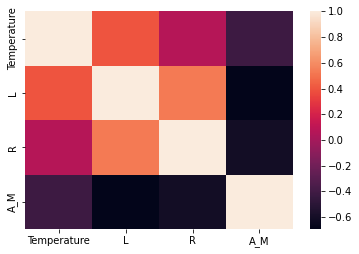

In [44]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

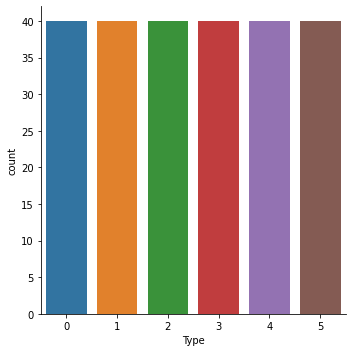

In [45]:
sns.catplot(x="Type",data= dfStarClassification,kind="count")
plt.show()

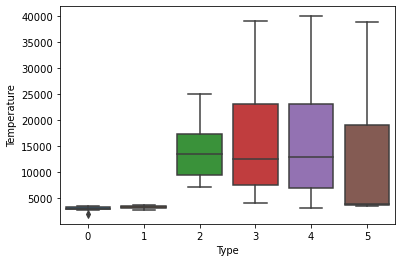

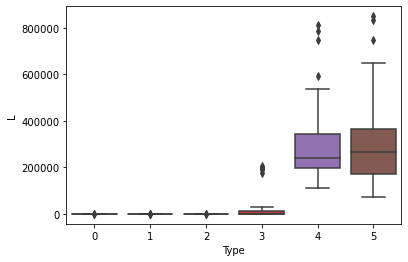

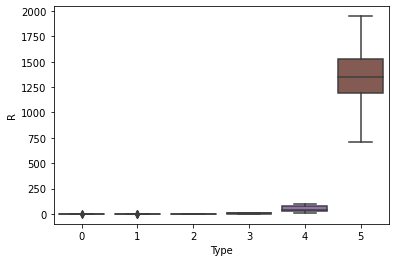

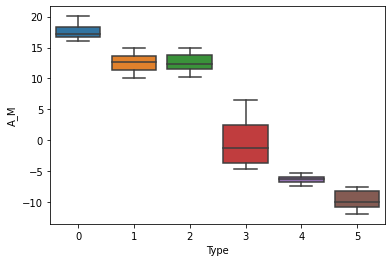

In [46]:
continuousColumns = ["Temperature","L","R","A_M"]
for item  in continuousColumns:
    sns.boxplot(x="Type", y=item, data=dfStarClassification)
    plt.show()


## Preprocessing

In [47]:
willOneHotEncode = ["Color","Spectral_Class"]
willScale  = continuousColumns

In [48]:
for item in willOneHotEncode:
    dfStarClassification = pd.concat([dfStarClassification,pd.get_dummies(dfStarClassification[item],prefix=item)],axis=1)
    dfStarClassification = dfStarClassification.drop(columns=[item])
dfStarClassification.head()


,Temperature,L,R,A_M,Type,Color_BLUE,Color_BLUE-WHITE,Color_ORANGE,Color_ORANGE-RED,Color_PALE-YELLOW-ORANGE,...,Color_YELLOW-WHITE,Color_YELLOWISH,Color_YELLOWISH-WHITE,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(dfStarClassification[willScale]),columns=willScale)
scaledColums.describe()

,Temperature,L,R,A_M
count,240.000000,2.400000e+02,240.000000,240.000000
mean,0.224862,1.261901e-01,0.121709,0.509768
std,0.250977,2.112409e-01,0.265413,0.329347
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.036921,9.238657e-10,0.000048,0.177846
50%,0.100812,8.290363e-08,0.000387,0.632677
75%,0.344618,2.331591e-01,0.021936,0.801048
max,1.000000,1.000000e+00,1.000000,1.000000


In [50]:
dfStarClassification.drop(willScale,axis=1,inplace=True)

In [51]:
dfStarClassification = pd.concat([dfStarClassification,scaledColums],axis=1)

In [52]:
dfStarClassification

,Type,Color_BLUE,Color_BLUE-WHITE,Color_ORANGE,Color_ORANGE-RED,Color_PALE-YELLOW-ORANGE,Color_RED,Color_WHITE,Color_WHITE-YELLOW,Color_WHITISH,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.029663,2.731275e-09,0.000083,0.876798
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.028980,4.944550e-10,0.000075,0.891807
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.017367,2.590003e-10,0.000048,0.957473
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.022622,1.412729e-10,0.000078,0.893371
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.000000,6.828189e-11,0.000049,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.972150,4.412776e-01,0.695919,0.062226
236,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.759307,9.818959e-01,0.612777,0.040338
237,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.181025,6.327765e-01,0.730304,0.037211
238,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.191692,4.767253e-01,0.570694,0.021576


In [53]:
correlation = dfStarClassification.corr().abs()
correlation.head()

,Color_BLUE,Color_BLUE-WHITE,Color_ORANGE,Color_ORANGE-RED,Color_PALE-YELLOW-ORANGE,Color_RED,Color_WHITE,Color_WHITE-YELLOW,Color_WHITISH,Color_YELLOW-WHITE,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
Color_BLUE,1.000000,0.250409,0.050572,0.035685,0.035685,0.516047,0.115033,0.035685,0.050572,0.102444,...,0.131815,0.152320,0.035685,0.088339,0.511743,0.810643,0.660964,0.439924,0.023897,0.355073
Color_BLUE-WHITE,0.250409,1.000000,0.041609,0.029361,0.029361,0.424590,0.094646,0.029361,0.041609,0.084288,...,0.594637,0.125325,0.029361,0.072683,0.421048,0.202993,0.293437,0.097048,0.045170,0.104256
Color_ORANGE,0.050572,0.041609,1.000000,0.005930,0.005930,0.085749,0.019114,0.005930,0.008403,0.017023,...,0.044638,0.025310,0.005930,0.278900,0.006895,0.040996,0.062310,0.247178,0.221030,0.113447
Color_ORANGE-RED,0.035685,0.029361,0.005930,1.000000,0.004184,0.060507,0.013488,0.004184,0.005930,0.012012,...,0.031498,0.017860,0.004184,0.403955,0.060002,0.028928,0.036544,0.038722,0.029615,0.001832
Color_PALE-YELLOW-ORANGE,0.035685,0.029361,0.005930,0.004184,1.000000,0.060507,0.013488,0.004184,0.005930,0.012012,...,0.031498,0.234277,0.004184,0.010358,0.060002,0.028928,0.022172,0.038722,0.029723,0.059682


## Train Test Split 

In [54]:
target = ["Type"]
features = dfStarClassification.columns.drop(target)
train,test = train_test_split(dfStarClassification,test_size = 0.22,random_state= 12)
xTrain = train[features]
yTrain = train[target]
xTest  = test[features]
yTest = test[target]


## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knnModel = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

knnModel= KNeighborsClassifier().fit(xTrain,yTrain.values.ravel())


In [57]:
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)


0.9056603773584906

In [58]:
print(classification_report(yTest,yPred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       0.92      0.86      0.89        14
           3       0.56      1.00      0.71         5
           4       1.00      1.00      1.00         6
           5       1.00      0.73      0.84        11

    accuracy                           0.91        53
   macro avg       0.91      0.93      0.91        53
weighted avg       0.94      0.91      0.91        53



## DecisionTree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dTree = DecisionTreeClassifier(criterion="gini", max_depth=4)
start = time.time()
dTree.fit(xTrain, yTrain)
end = time.time()
preddt = dTree.predict(xTest)
print(classification_report(yTest,preddt))
print("Prosesing Time",end-start)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        11

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Prosesing Time 0.004008054733276367


In [61]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
start = time.time()
dTree.fit(xTrain, yTrain)
end = time.time()
preddt = dTree.predict(xTest)
print(classification_report(yTest,preddt))
print("Prosesing Time: ",end-start)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        11

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Prosesing Time:  0.0029916763305664062
